## In Demands Skills for Data Analysts

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

In [82]:
#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [83]:
df_us_da = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')]

df_us_da['job_posted_month_no'] = df_us_da['job_posted_date'].dt.month

df_us_da_explode = df_us_da.explode('job_skills')

C:\Users\manik\AppData\Local\Temp\ipykernel_14724\3245678278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_da['job_posted_month_no'] = df_us_da['job_posted_date'].dt.month


In [84]:
df_us_da_pivot = df_us_da_explode.pivot_table(
    index='job_posted_month_no',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)
#sort the pivot table by the sum of total jobs of a particular skill
df_us_da_pivot.loc['Total'] = df_us_da_pivot.sum()
df_us_da_pivot = df_us_da_pivot[df_us_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_us_da_pivot.drop('Total',inplace=True)

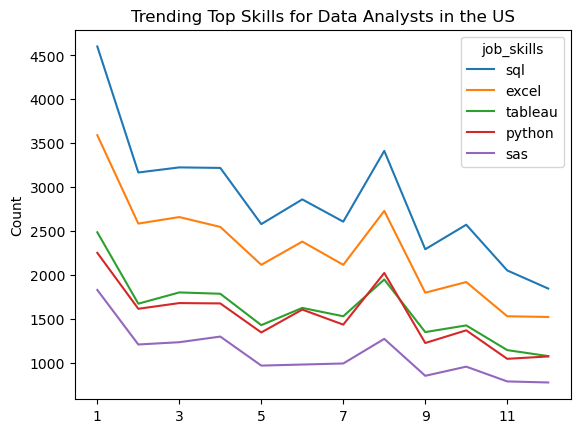

In [86]:
df_us_da_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [115]:
da_totals = df_us_da.groupby('job_posted_month_no').size()
#use div to divide 
df_da_us_perc = df_us_da_pivot.div(da_totals/100,axis=0)

In [116]:
#df_da_us_perc = df_da_us_perc.reset_index()
#df_da_us_perc['job_posted_month'] = df_da_us_perc['job_posted_month_no'].apply(lambda x:pd.to_datetime(x,format='%m').strftime('%b'))
# df_da_us_perc.set_index('job_posted_month',inplace=True)
#df_da_us_perc.drop(columns='job_posted_month',inplace=True)
df_da_us_perc

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
2,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
5,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
6,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
7,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\manik\AppData\Local\Temp\ipykernel_14724\3361882773.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(12,df_plot.iloc[-1][i],df_plot.columns[i])


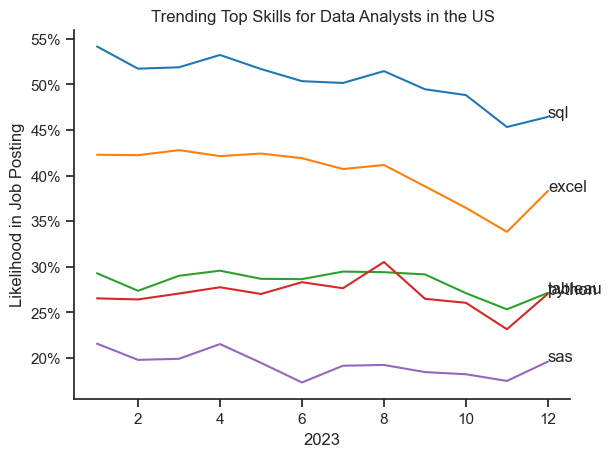

In [ ]:
from matplotlib.ticker import PercentFormatter
df_plot = df_da_us_perc.iloc[:,0:5]
sns.lineplot(data=df_plot,dashes=False,palette='tab10',legend='full')
sns.set_theme(style='ticks')
sns.despine()#remove right ans upper margins or lines
plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
for i in range(5):
    plt.text(12,df_plot.iloc[-1][i],df_plot.columns[i],color='black')
plt.show()